In [2]:
from torchvision.datasets import CIFAR10, FashionMNIST
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torchvision import transforms
import PIL
from models.predefined import InstanceDependentNoiseAdder
from models.utils import set_global_seed
set_global_seed(42)

In [3]:
def plot_tsne(X, y, noise_ratio):
    plt.style.use('seaborn-v0_8-whitegrid')
    tsne = TSNE(n_components=2, perplexity=5, max_iter=1000, random_state=42)
    X_tsne = tsne.fit_transform(X)

    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7,
                         edgecolors='none', s=80)
    ax.set_title(f"t-SNE Visualization with Noise Ratio {noise_ratio}", fontsize=16)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    plt.tight_layout()
    plt.show()


In [4]:
def get_image_size(dataset):
    sample, _ = dataset[0]
    if isinstance(sample, PIL.Image.Image):
        sample = transforms.ToTensor()(sample)
    return sample.shape[0] * sample.shape[1] * sample.shape[2]

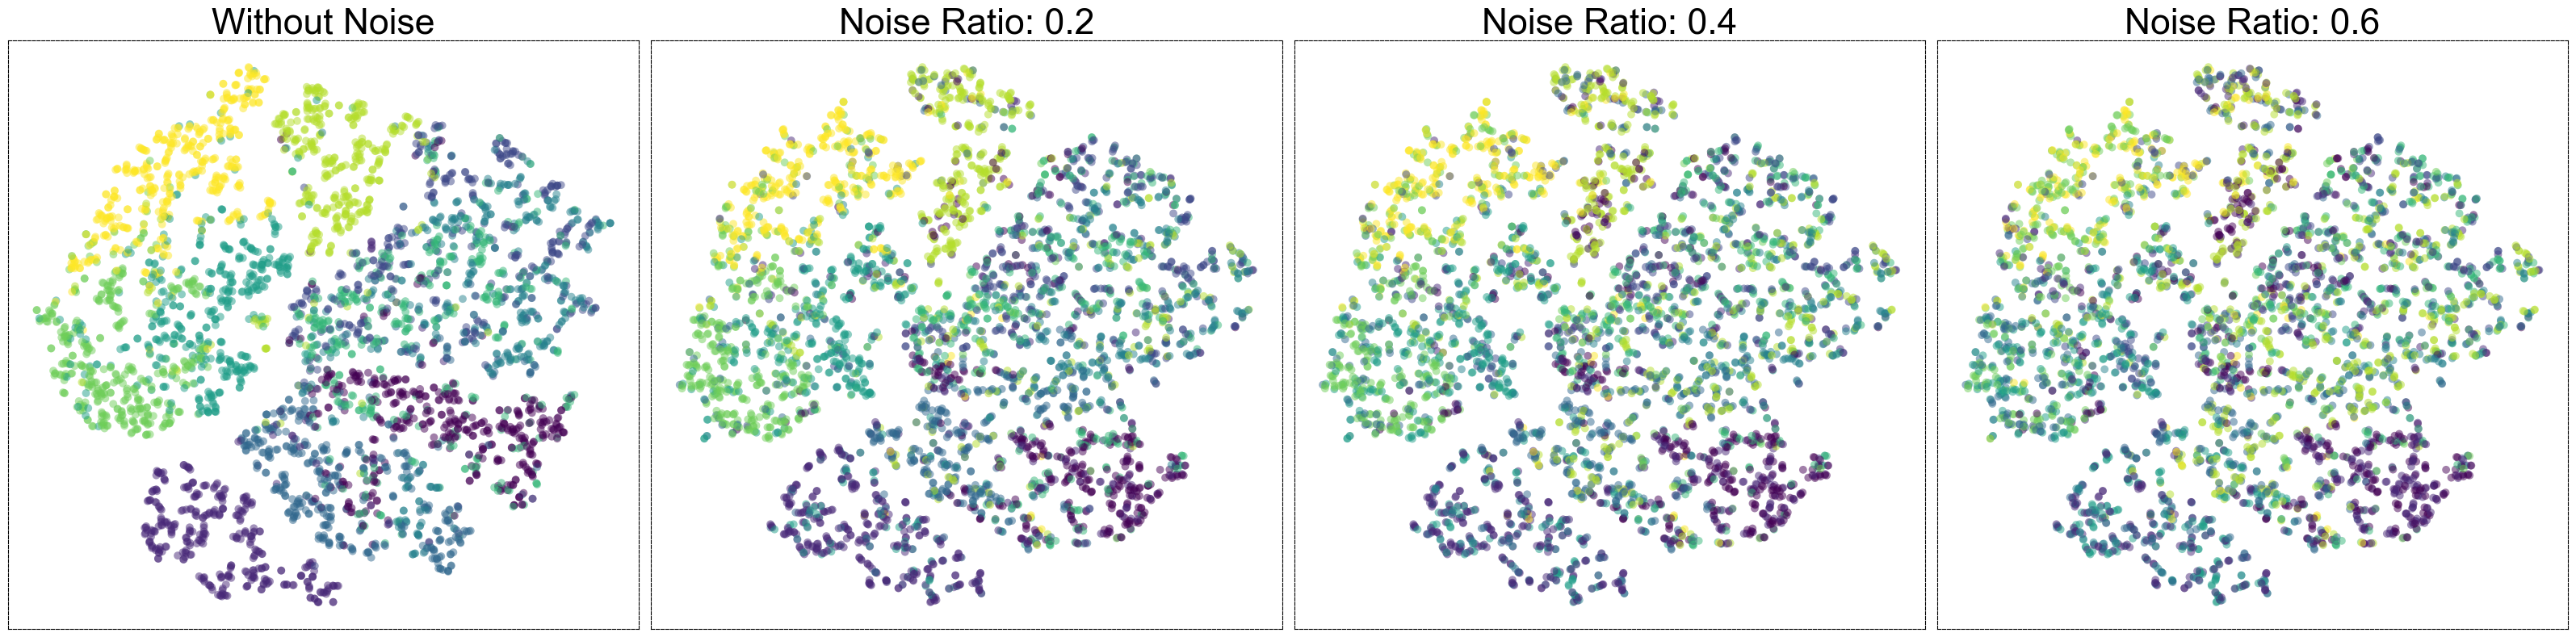

In [6]:
plt.rcParams['font.family'] = 'Arial'

fig, axes = plt.subplots(1, 4, figsize=(32, 8), dpi=100)
ratios = [0, 0.2, 0.4, 0.6]

for ax, ratio in zip(axes.flatten(), ratios):
    ds = FashionMNIST(root='./data', train=True, download=True)
    if ratio != 0:
        _image_size = get_image_size(ds)
        noise_adder = InstanceDependentNoiseAdder(ds, image_size=_image_size, ratio=ratio, num_classes=10)
        noise_adder.add_noise()
        
    n_total = ds.data.shape[0]
    n_sample = n_total // 15
    sample_idx = np.random.choice(n_total, size=n_sample, replace=False)
    X_sample = ds.data[sample_idx].reshape(n_sample, -1)
    y_sample = np.array(ds.targets)[sample_idx]
    
    tsne = TSNE(n_components=2, perplexity=5, max_iter=1000)
    X_tsne = tsne.fit_transform(X_sample)
    
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='viridis', alpha=0.5,
               edgecolors='none', s=50)
    
    font_size = 32
    if ratio == 0:
        ax.set_title("Without Noise", fontsize=font_size)
    else:
        ax.set_title(f"Noise Ratio: {ratio}", fontsize=font_size)

    for spine in ax.spines.values():
        spine.set_linestyle('--')
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)

plt.tight_layout()
plt.savefig("vectorized_figure.pdf", format="pdf", bbox_inches='tight')
plt.show()